In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('crime_data.csv')

In [3]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
 df_2=df.copy()

In [5]:
df_2.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
df_2

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


<AxesSubplot:xlabel='Assault', ylabel='Density'>

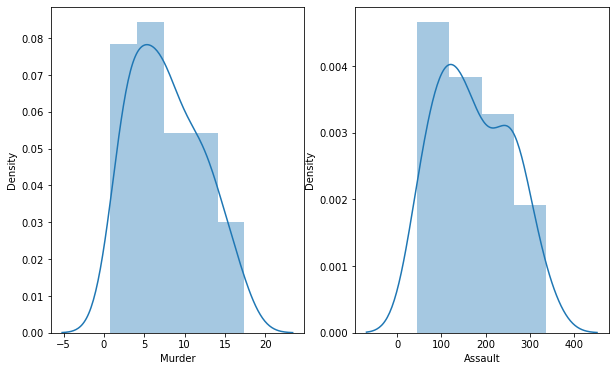

In [7]:
f,ax=plt.subplots(1,2,figsize=(10,6))
sns.distplot(df_2['Murder'],ax=ax[0])
sns.distplot(df_2['Assault'],ax=ax[1])

<AxesSubplot:xlabel='Rape', ylabel='Density'>

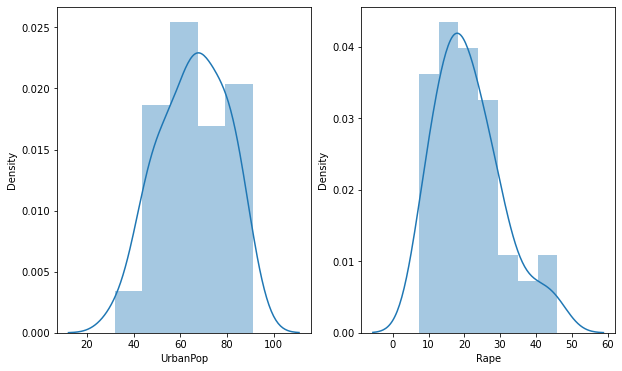

In [8]:
f,ax=plt.subplots(1,2,figsize=(10,6))
sns.distplot(df_2['UrbanPop'],ax=ax[0])
sns.distplot(df_2['Rape'],ax=ax[1])

<AxesSubplot:>

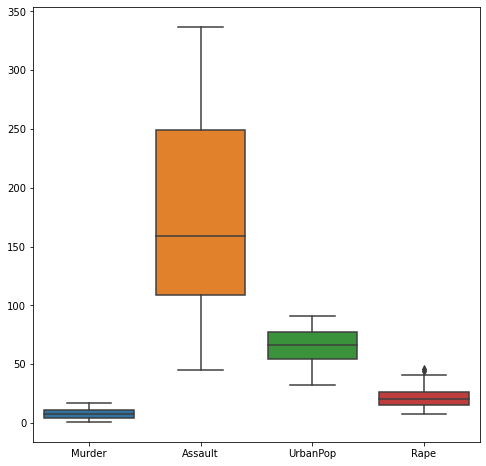

In [9]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df_2,orient='v')

In [10]:
scale=StandardScaler()
df_3=scale.fit_transform(df_2)

In [11]:
df_3

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [12]:
df_4=pd.DataFrame(data=df_3,columns=('Murder','Assault','UrbanPop','Rape'))
df_4

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


Text(0, 0.5, 'wcss')

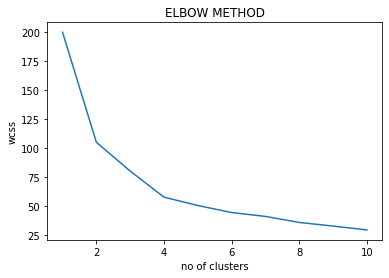

In [13]:
WCSS=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df_4)
    WCSS.append(kmeans.inertia_)

plt.plot(range(1,11),WCSS)
plt.title('ELBOW METHOD')
plt.xlabel('no of clusters')
plt.ylabel('wcss')

In [14]:
kmeans_new=KMeans(n_clusters=4,random_state=42)
kmeans_new.fit(df_4)

KMeans(n_clusters=4, random_state=42)

In [15]:
kmeans_new.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [16]:
df['kmeans_clusters']=kmeans_new.labels_

In [17]:
df.rename(columns={'Unnamed: 0':'States'},inplace=True)

In [18]:
df.groupby(['kmeans_clusters']).agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
kmeans_clusters,,,,
0,5.656250,138.875000,73.875000,18.781250
1,13.937500,243.625000,53.750000,21.412500
2,10.815385,257.384615,76.000000,33.192308
3,3.600000,78.538462,52.076923,12.176923


In [19]:
df[df['kmeans_clusters'] == 0]

,States,Murder,Assault,UrbanPop,Rape,kmeans_clusters
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0


In [20]:
df[df['kmeans_clusters'] == 1]

,States,Murder,Assault,UrbanPop,Rape,kmeans_clusters
0,Alabama,13.2,236,58,21.2,1
3,Arkansas,8.8,190,50,19.5,1
9,Georgia,17.4,211,60,25.8,1
17,Louisiana,15.4,249,66,22.2,1
23,Mississippi,16.1,259,44,17.1,1
32,North Carolina,13.0,337,45,16.1,1
39,South Carolina,14.4,279,48,22.5,1
41,Tennessee,13.2,188,59,26.9,1


In [21]:
df[df['kmeans_clusters'] == 2]

,States,Murder,Assault,UrbanPop,Rape,kmeans_clusters
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
8,Florida,15.4,335,80,31.9,2
12,Illinois,10.4,249,83,24.0,2
19,Maryland,11.3,300,67,27.8,2
21,Michigan,12.1,255,74,35.1,2
24,Missouri,9.0,178,70,28.2,2
27,Nevada,12.2,252,81,46.0,2


In [22]:
df

,States,Murder,Assault,UrbanPop,Rape,kmeans_clusters
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


# Hierarchical clustering

In [23]:
from sklearn.cluster import AgglomerativeClustering
data_1=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')
data_1=data_1.fit_predict(df_4)
data_1

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 1,
       0, 3, 1, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
df['hierarchical_cluster']=data_1

In [25]:
df.groupby(['hierarchical_cluster']).agg(['mean'])

,Murder,Assault,UrbanPop,Rape,kmeans_clusters
,mean,mean,mean,mean,mean
hierarchical_cluster,,,,,
0,4.870000,114.433333,63.633333,15.943333,1.333333
1,10.883333,256.916667,78.333333,32.250000,2.000000
2,10.000000,263.000000,48.000000,44.500000,2.000000
3,14.671429,251.285714,54.285714,21.685714,1.000000


In [26]:
df.groupby(['kmeans_clusters']).agg(['mean'])

,Murder,Assault,UrbanPop,Rape,hierarchical_cluster
,mean,mean,mean,mean,mean
kmeans_clusters,,,,,
0,5.656250,138.875000,73.875000,18.781250,0.000000
1,13.937500,243.625000,53.750000,21.412500,2.625000
2,10.815385,257.384615,76.000000,33.192308,1.076923
3,3.600000,78.538462,52.076923,12.176923,0.000000


In [27]:
df

,States,Murder,Assault,UrbanPop,Rape,kmeans_clusters,hierarchical_cluster
0,Alabama,13.2,236,58,21.2,1,3
1,Alaska,10.0,263,48,44.5,2,2
2,Arizona,8.1,294,80,31.0,2,1
3,Arkansas,8.8,190,50,19.5,1,0
4,California,9.0,276,91,40.6,2,1
5,Colorado,7.9,204,78,38.7,2,1
6,Connecticut,3.3,110,77,11.1,0,0
7,Delaware,5.9,238,72,15.8,0,0
8,Florida,15.4,335,80,31.9,2,1
9,Georgia,17.4,211,60,25.8,1,3


{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [13.75, 13.75, 52.5, 52.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [115.0, 115.0, 125.0, 125.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [205.0, 205.0, 222.5, 222.5],
  [195.0, 195.0, 213.75, 213.75],
  [245.0, 245.0, 255.0, 255.0],
  [204.375, 204.375, 250.0, 250.0],
  [172.5, 172.5, 227.1875, 227.1875],
  [142.5, 142.5, 199.84375, 199.84375],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [265.0, 265.0, 282.5, 282.5],
  [171.171875, 171.171875, 273.75, 273.75],
  [120.0, 120.0, 222.4609375, 222.4609375],
  [83.75, 83.75, 171.23046875, 171.23046875],
  [33.125, 33.125, 127.490234375, 127.490234375],
  [335.0, 335.0, 3

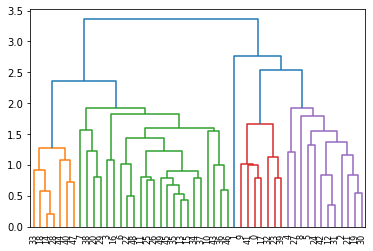

In [28]:
import scipy.cluster.hierarchy as sh
sh.dendrogram(sh.linkage(df_4,method='average',metric='euclidean'))

# DBSCAN

In [29]:
from sklearn.cluster import DBSCAN

In [40]:
dbscan=DBSCAN(eps=0.5,min_samples=12)
data_2=dbscan.fit(df_4)
data_2.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [41]:
df['DBSCAN_cluster']=data_2.labels_

In [42]:
df.groupby(['DBSCAN_cluster']).agg(['mean'])

,Murder,Assault,UrbanPop,Rape,kmeans_clusters,hierarchical_cluster
,mean,mean,mean,mean,mean,mean
DBSCAN_cluster,,,,,,
-1,7.788,170.76,65.54,21.232,1.46,0.7


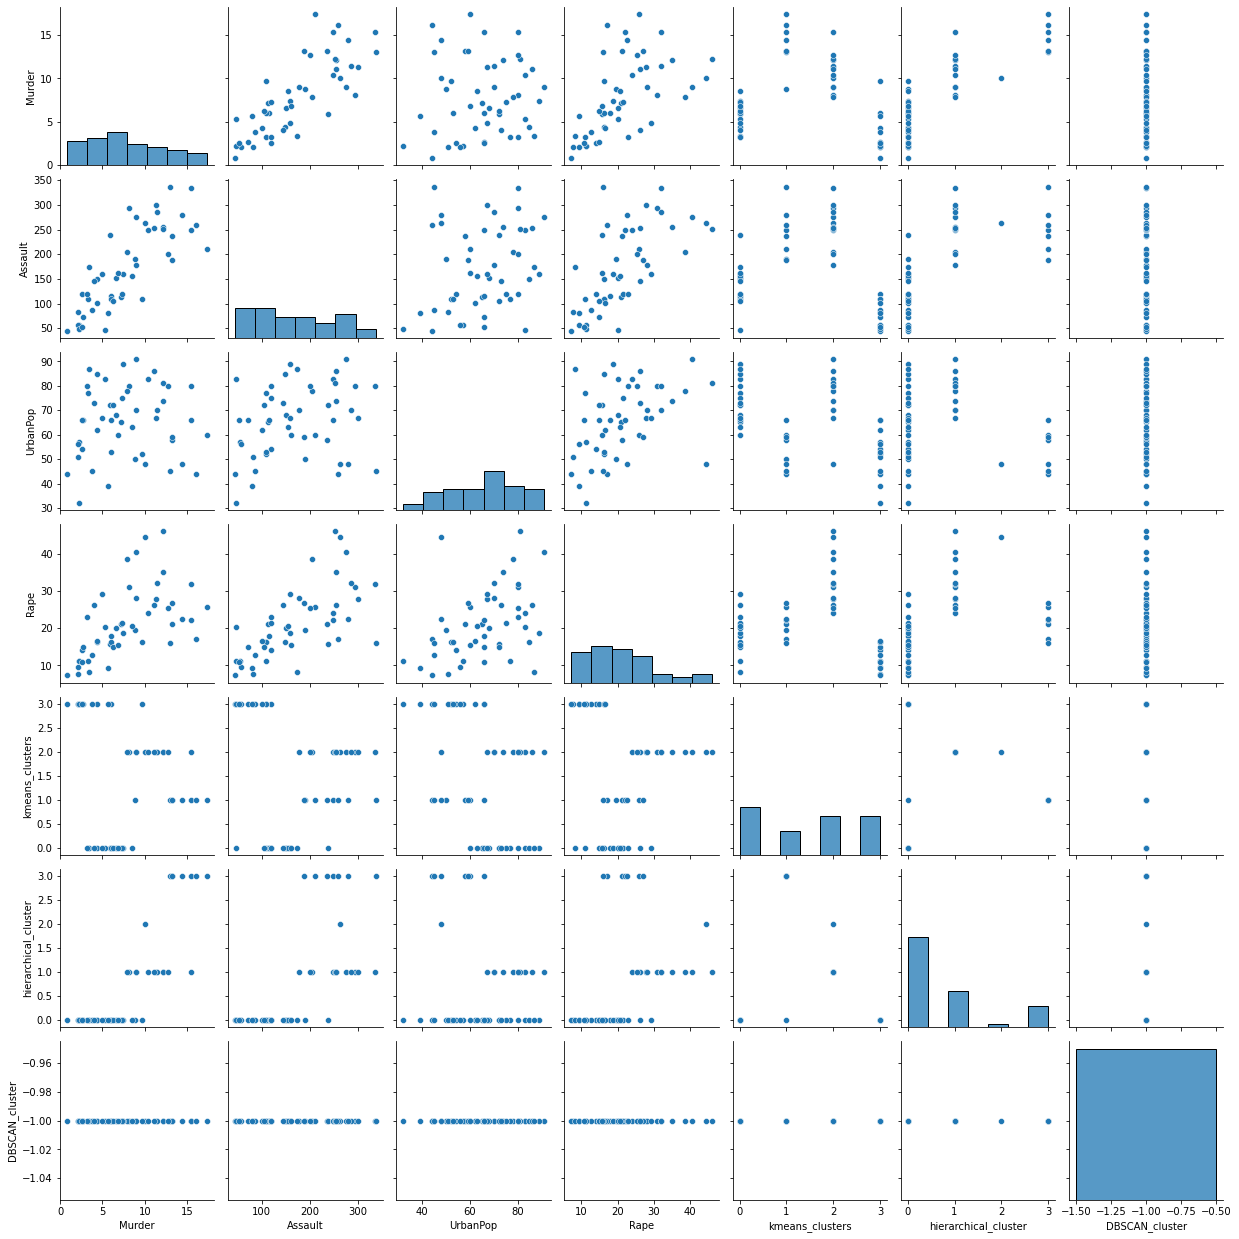

In [43]:
sns.pairplot(df)

# Conclusion

* Analysing Murder and Assault variables shows a clearer connection between them.
* Assault and rape variable has aslo have lite relationship.
* UrbanPop has no strong connection between any feature.